# Regression and Simulation Methods

## Final Assignment Question 2

Below we have our estimators.
1. Basic IS Estimator, $\hat{I}_{N}$ of the mean of $\tilde{\pi}(x)$.
2. Self-Normalised IS Estimaor (SNIS), $\tilde{I}_{N}$ of the mean of $\tilde{\pi}(x)$.
3. Estimator, $\hat{Z}_{N}$ of $Z = \int \pi(x) dx$.

Please note that this notebook isn't commented fully. Commentary over the results can be found in the final submission. 

The code written here is not optimised and so therefore may take a while to run for oneself.

In [1]:
import numpy as np #Import for numerical purposes.
import matplotlib.pyplot as plt #Import for plotting purposes.
from scipy.stats import norm #Import for normal distribution.

In [2]:
def BasicIS(k, j):
    
    n = 0    
    BISHold = []
    
    while n <= k:

        def f(x):
            Z = 1/3 * pow(2, 3)
            return pow(Z, -1)*pow(x, 2)
    
        def p(x):
            return norm.pdf(x, loc=0, scale=2)
    
        def q(x):
            return norm.pdf(x, loc=0, scale=2)
    
        i = 0 
        muHold = [] 

        while i < j: 
            x = np.random.normal(0, 2)
            mu = (f(x)*p(x))/(q(x))
            muHold.append(mu)
            i += 1

        BISHold.append(np.mean(muHold))
        n += 1
        
    mean = np.mean(BISHold)
    var = np.var(BISHold)
    bias = np.mean(BISHold)-(1.5)
    MSE = np.mean(pow((np.full((1, len(BISHold)), 1.5)-(BISHold)), 2))
    
    return mean, var, bias, MSE

print(BasicIS(pow(10, 6), 100))

In [3]:
def SelfNormalisedIS(k, j):
    
    n = 0
    SNISHold = []
    
    while n <= k:
        
        def f(x):
            Z = 1/3 * pow(2, 3)
            return pow(Z, -1)*pow(x, 2)
    
        def p(x):
            return norm.pdf(x, loc=0, scale=2)
    
        def q(x):
            return norm.pdf(x, loc=0, scale=2)
        
        i = 0
        muHold = []
        nuHold = []
        
        while i < j:
            x = np.random.normal(0, 2)
            mu = (f(x)*p(x))/(q(x))
            muHold.append(mu)
            nu = p(x)/q(x)
            nuHold.append(nu)
            i += 1
        
        SNISHold.append(np.mean(muHold)/np.mean(nuHold))
        n += 1
        
    mean = np.mean(SNISHold)
    var = np.var(SNISHold)
    bias = np.mean(SNISHold)-(1.5)
    MSE = np.mean(pow((np.full((1, len(SNISHold)), 1.5)-(SNISHold)), 2))
    
    return mean, var, bias, MSE

print(SelfNormalisedIS(pow(10, 6), 100))

In [15]:
def ZEstimator(k, j):
    
    n = 0
    ZHold = []
    
    while n <= k:
        
        def f(x):
            if x >= 0 and x <= 2:
                return pow(x, 2)
            else:
                return 0
        
        def q(x):
            return norm.pdf(x, loc=0, scale=2)
        
        i = 0
        rHold = []
        
        while i < j:
            x = np.random.normal(0, 2)
            est = f(x)/q(x)
            rHold.append(est)
            i += 1
        
        ZHold.append(np.mean(rHold))
        n += 1
    
    mean = np.mean(ZHold)
    var = np.var(ZHold)
    bias = np.mean(ZHold)-(8/3)
    MSE = np.mean(pow((np.full((1, len(ZHold)), 8/3)-(ZHold)), 2))
    
    return mean, var, bias, MSE

print(ZEstimator(pow(10, 6), 100))

In [21]:
import time
t1 = time.time()
Vals = [50, 100, 500, 1000, 5000]

VarBHold = []
VarSNHold = []
VarZHold = []

BiBHold = []
BiSNHold = []
BiZHold = []

MSEBHold = []
MSESNHold = []
MSEZHold = []

for j in Vals:
    
    Basic = BasicIS(pow(10, 6), j)
    SN = SelfNormalisedIS(pow(10, 6), j)
    Z = ZEstimator(pow(10, 6), j)
    
    VarBHold.append(Basic[1])
    VarSNHold.append(SN[1])
    VarZHold.append(Z[1])
    
    BiBHold.append(Basic[2])
    BiSNHold.append(SN[2])
    BiZHold.append(Z[2])
    
    MSEBHold.append(Basic[3])
    MSESNHold.append(SN[3])
    MSEZHold.append(Z[3])

[0.046376402525966975, 0.01473138674730512, 0.0011866131881466124, -0.0009756091081289942, 0.00024700576682157305]
[-0.003225871255877699, -0.004482163801602157, -0.010898765413765332, 0.0064234345098839185, 5.047500351240686e-06]


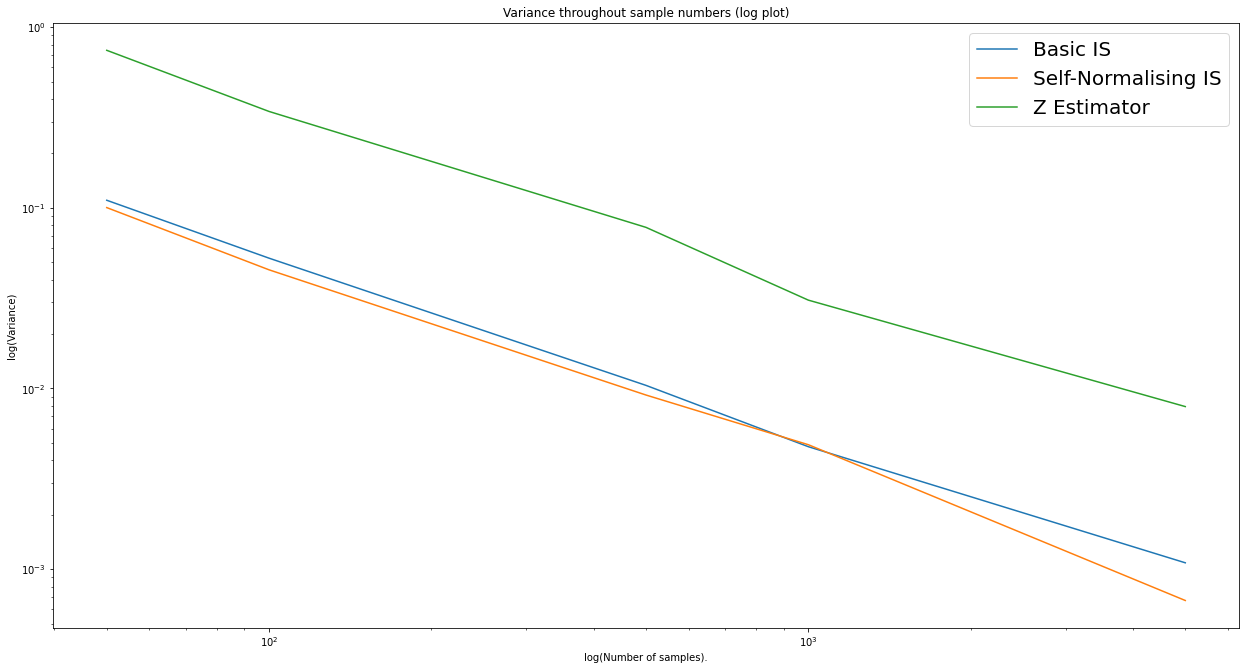

In [18]:
print(BiSNHold)
print(BiBHold)

fig, (d1) = plt.subplots(1, 1, sharey=True) 

d1.plot(Vals, VarBHold)
d1.plot(Vals, VarSNHold)
d1.plot(Vals, VarZHold)

plt.yscale("log")
plt.xscale("log")
plt.legend(["Basic IS", "Self-Normalising IS", "Z Estimator"], prop={"size":20})

d1.set_xlabel('log(Number of samples).')
d1.set_ylabel('log(Variance)') 
d1.title.set_text('Variance throughout sample numbers (log plot)')

fig.set_size_inches(18.5, 10.5, forward=True)
fig.tight_layout(pad=5.0) 
plt.show()

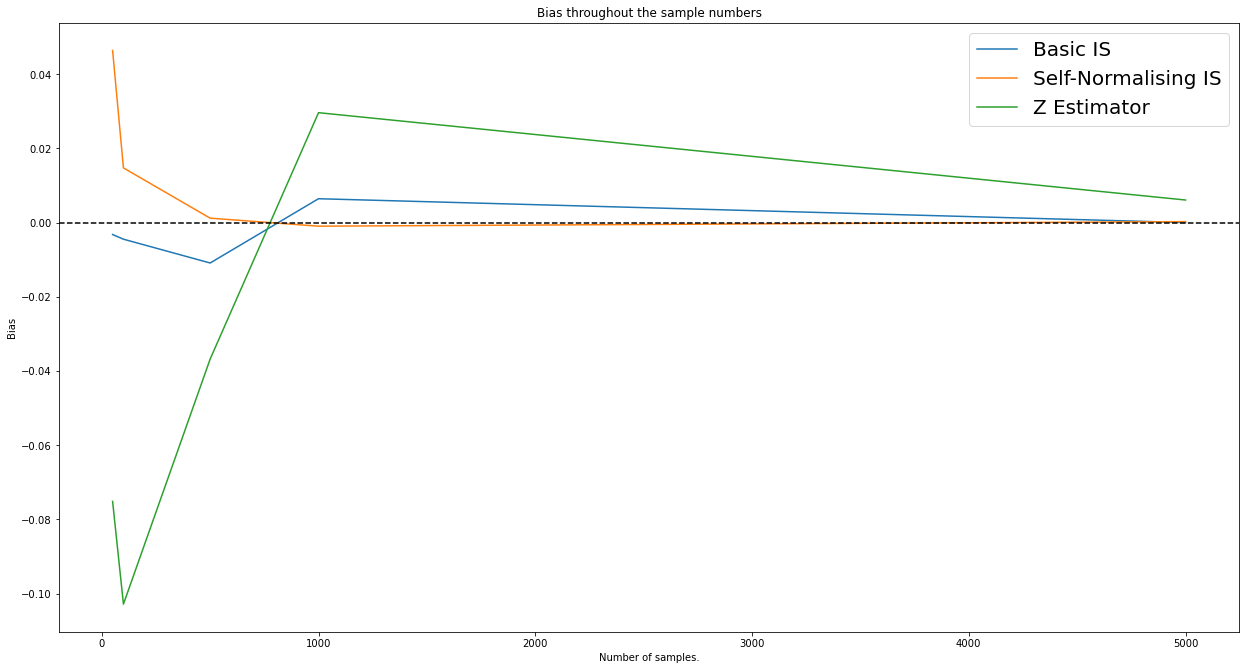

In [19]:
fig, (d2) = plt.subplots(1, 1, sharey=True)

d2.plot(Vals, BiBHold)
d2.plot(Vals, BiSNHold)
d2.plot(Vals, BiZHold)

plt.legend(["Basic IS", "Self-Normalising IS", "Z Estimator"], prop={"size":20})
plt.axhline(y=0, color="black", linestyle = "--")

d2.set_xlabel('Number of samples.')
d2.set_ylabel('Bias') 
d2.title.set_text('Bias throughout the sample numbers')

fig.set_size_inches(18.5, 10.5, forward=True)
fig.tight_layout(pad=5.0)
plt.show()

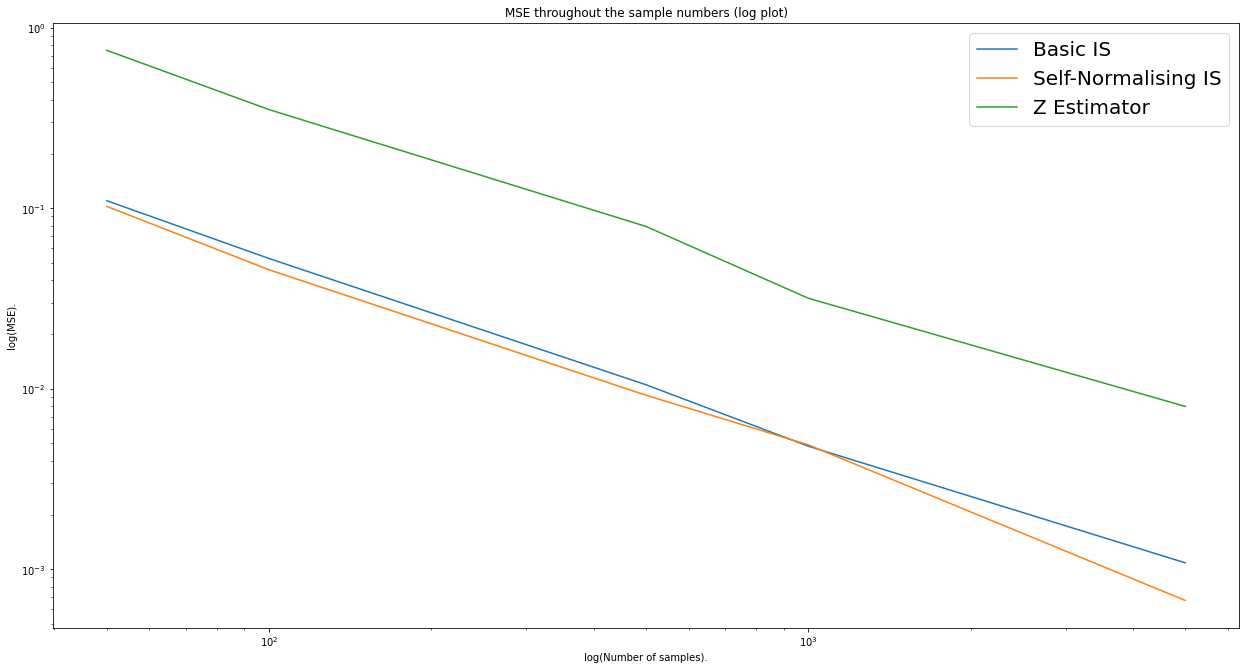

In [20]:
fig, (d3) = plt.subplots(1, 1, sharey=True) 

d3.plot(Vals, MSEBHold)
d3.plot(Vals, MSESNHold)
d3.plot(Vals, MSEZHold)

plt.legend(["Basic IS", "Self-Normalising IS", "Z Estimator"], prop={"size":20})
plt.yscale("log")
plt.xscale("log")

d3.set_xlabel('log(Number of samples).') 
d3.set_ylabel('log(MSE).') 
d3.title.set_text('MSE throughout the sample numbers (log plot)') 

fig.set_size_inches(18.5, 10.5, forward=True) 
fig.tight_layout(pad=5.0) 
plt.show()